# Stock Forecasting

Time Series is a collection of data points collected at constant time intervals.
It is time dependent. 
Along with an increasing or decreasing trend, most TS have some form of seasonality trends, i.e. variations specific to a particular time frame. For example, if you see the sales of a woolen jacket over time, you will invariably find higher sales in winter seasons.

In [514]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Loading and Handling Time Series in Pandas

In [515]:
# load the raw data
apple = pd.read_csv("AAPL.csv")
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-02,1.151786,1.151786,1.133929,1.147321,0.993233,34823600
1,1996-01-03,1.142857,1.174107,1.138393,1.147321,0.993233,107458400
2,1996-01-04,1.156250,1.156250,1.120536,1.127232,0.975842,75045600
3,1996-01-05,1.129464,1.223214,1.120536,1.223214,1.058933,111482000
4,1996-01-08,1.232143,1.267857,1.214286,1.236607,1.070527,30335200


In [516]:
# identify the data type
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6193 entries, 0 to 6192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6193 non-null   object 
 1   Open       6193 non-null   float64
 2   High       6193 non-null   float64
 3   Low        6193 non-null   float64
 4   Close      6193 non-null   float64
 5   Adj Close  6193 non-null   float64
 6   Volume     6193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 338.8+ KB


# Time Series Data Structure
3 types of structures are used with TS data:
    - DatetimeIndex (mostly used)
    - PeriodIndex
    - TimedeltaIndex
Why do we need to convert the time into datetime while working with TS data?
Time series data can come in with so many different formats. But not all of those formats are friendly to python’s pandas’ library. The most convenient format is the timestamp format for Pandas. But most of the time time-series data come in string formats. That is the reason why we need to change the date type from object to timestamp.

We will make it to the DatetimeIndex format and put it as the index column.
Because when the ‘date’ column is the index column we will be able to resample it very easily. 

In [517]:
apple = pd.read_csv("AAPL.csv", parse_dates=['Date'], index_col="Date")
apple.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-31,411.540009,425.660004,403.299988,425.040009,425.040009,93584200
2020-08-03,432.799988,446.549988,431.570007,435.750000,435.750000,77037800
2020-08-04,436.529999,443.160004,433.549988,438.660004,438.660004,43267900
2020-08-05,437.510010,441.570007,435.589996,440.250000,440.250000,30498000
2020-08-06,441.619995,457.649994,439.190002,455.609985,455.609985,50490000


# Why is resampling important?
Because we do not always need all the data in a huge dataset. For example, we may need only the data from June 2019. 
If your date format is in DatetimeIndex, it is very easy:

In [518]:
apple['2019']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,154.889999,158.850006,154.229996,157.919998,154.794983,37039700
2019-01-03,143.979996,145.720001,142.000000,142.190002,139.376251,91312200
2019-01-04,144.529999,148.550003,143.800003,148.259995,145.326126,58607100
2019-01-07,148.699997,148.830002,145.899994,147.929993,145.002686,54777800
2019-01-08,149.559998,151.820007,148.520004,150.750000,147.766861,41025300
...,...,...,...,...,...,...
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.831299,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,288.442780,23280300
2019-12-27,291.119995,293.970001,288.119995,289.799988,288.333313,36566500


In [519]:
# Or we can get the data for a single day
apple.loc['2019-12-30']

Open         2.894600e+02
High         2.926900e+02
Low          2.852200e+02
Close        2.915200e+02
Adj Close    2.900446e+02
Volume       3.602860e+07
Name: 2019-12-30 00:00:00, dtype: float64

In [520]:
# Check if there is any missing data
apple.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [521]:
# dropping Close column, as we will use the Adjusted Close column for our model
apple = apple.drop('Close', axis=1)

In [522]:
apple = apple.rename(columns={"Adj Close": "Close"})

In [523]:
apple

,Open,High,Low,Close,Volume
Date,,,,,
1996-01-02,1.151786,1.151786,1.133929,0.993233,34823600
1996-01-03,1.142857,1.174107,1.138393,0.993233,107458400
1996-01-04,1.156250,1.156250,1.120536,0.975842,75045600
1996-01-05,1.129464,1.223214,1.120536,1.058933,111482000
1996-01-08,1.232143,1.267857,1.214286,1.070527,30335200
...,...,...,...,...,...
2020-07-31,411.540009,425.660004,403.299988,425.040009,93584200
2020-08-03,432.799988,446.549988,431.570007,435.750000,77037800
2020-08-04,436.529999,443.160004,433.549988,438.660004,43267900


In [524]:
# Call the .corr() method on the apple dataset to view the relationships among the features of the dataset
apple.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999920,0.999916,0.998900,-0.359337
High,0.999920,1.000000,0.999868,0.999056,-0.357955
Low,0.999916,0.999868,1.000000,0.998961,-0.361110
Close,0.998900,0.999056,0.998961,1.000000,-0.360740
Volume,-0.359337,-0.357955,-0.361110,-0.360740,1.000000


# How to Check Stationarity of our TS data?

We can check stationarity using the following:
- Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months.

- Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

In [526]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

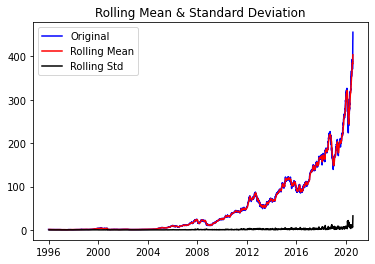

Results of Dickey-Fuller Test:
Test Statistic                    5.150154
p-value                           1.000000
#Lags Used                       34.000000
Number of Observations Used    6158.000000
Critical Value (1%)              -3.431412
Critical Value (5%)              -2.862009
Critical Value (10%)             -2.567020
dtype: float64


In [527]:
# Do I check the stationary for a portion of my data, or is it needed for the entire time series?
test_stationarity(apple['Close'])

In [564]:
# Though the variation in standard deviation is small, mean is clearly increasing with time and this is not a stationary series.
# There are 2 major reasons behind non-stationaruty of a TS:
# 1. Trend
# 2. Seasonality
# The underlying principle is to model or estimate the trend and seasonality in the series and 
# remove those from the series to get a stationary series. In our case we will estimate the trend, as our data does not have any seasonality.

# Estimating & Eliminating Trend

One of the first tricks to reduce trend can be transformation. For example, in this case we can clearly see that the there is a significant positive trend. So we can apply transformation which penalize higher values more than smaller values. These can be taking a log, square root, cube root, etc. Lets take a log transform here for simplicity:

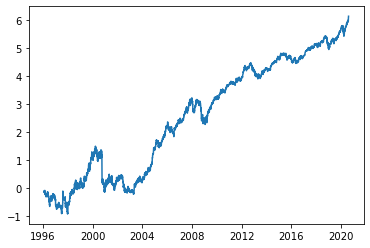

In [566]:
apple_log = np.log(apple['Close'])
plt.plot(apple_log)
plt.show()

In this simpler case, it is easy to see a forward trend in the data. But its not very intuitive in presence of noise. So we can use some techniques to estimate or model this trend and then remove it from the series. There can be many ways of doing it and some of most commonly used are:

- Aggregation – taking average for a time period like monthly/weekly averages
- Smoothing – taking rolling averages
- Polynomial Fitting – fit a regression model

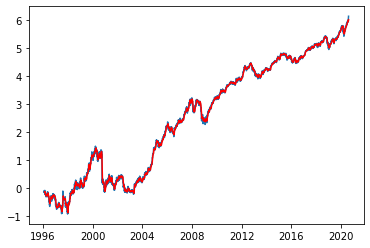

In [573]:
# Smoothing
# Here we can take the average over the past 1 year, i.e. last 12 values.
moving_avg = apple_log.rolling(window = 12).mean()
plt.plot(apple_log)
plt.plot(moving_avg, color='red')
plt.show()

The red line shows the rolling mean. Lets subtract this from the original series.

In [577]:
apple_log_moving_avg_diff = apple_log - moving_avg
apple_log_moving_avg_diff.dropna(inplace=True)
apple_log_moving_avg_diff.head(12)

Date
1996-02-21    0.041973
1996-02-22    0.048614
1996-02-23    0.047914
1996-02-26    0.031674
1996-02-27   -0.000648
1996-02-28   -0.031693
1996-02-29   -0.038132
1996-03-01   -0.057333
1996-03-04   -0.076610
1996-03-05   -0.058228
1996-03-06   -0.070722
1996-03-07   -0.075442
Name: Close, dtype: float64

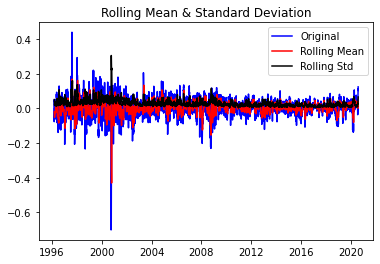

Results of Dickey-Fuller Test:
Test Statistic                -1.611294e+01
p-value                        4.990671e-29
#Lags Used                     1.700000e+01
Number of Observations Used    6.140000e+03
Critical Value (1%)           -3.431415e+00
Critical Value (5%)           -2.862011e+00
Critical Value (10%)          -2.567021e+00
dtype: float64


In [578]:
test_stationarity(apple_log_moving_avg_diff)

This looks like a much better series.

However, a drawback in this particular approach is that the time-period has to be strictly defined. In this case we can take yearly averages but in complex situations like forecasting a stock price, its difficult to come up with a number. So we take a ‘weighted moving average’ where more recent values are given a higher weight. There can be many technique for assigning weights. A popular one is exponentially weighted moving average where weights are assigned to all the previous values with a decay factor.

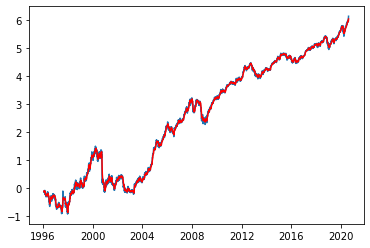

In [613]:
expwighted_avg = apple_log.ewm(span = 12).mean()
plt.plot(apple_log)
plt.plot(expwighted_avg, color='red')
plt.show()

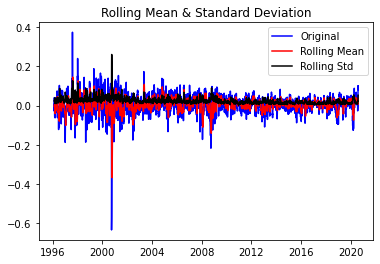

Results of Dickey-Fuller Test:
Test Statistic                -1.323256e+01
p-value                        9.519698e-25
#Lags Used                     2.200000e+01
Number of Observations Used    6.146000e+03
Critical Value (1%)           -3.431414e+00
Critical Value (5%)           -2.862010e+00
Critical Value (10%)          -2.567020e+00
dtype: float64


In [603]:
apple_log_ewma_diff = apple_log - expwighted_avg
test_stationarity(apple_log_ewma_diff)

# Eliminating Trend

One of the most common methods of dealing with both trend and seasonality is differencing. In this technique, we take the difference of the observation at a particular instant with that at the previous instant. 

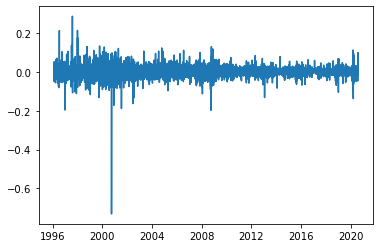

In [621]:
apple_log_diff = apple_log - apple_log.shift()
plt.plot(apple_log_diff)
plt.show()

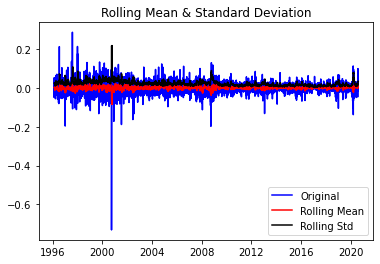

Results of Dickey-Fuller Test:
Test Statistic                -1.689182e+01
p-value                        1.043698e-29
#Lags Used                     2.100000e+01
Number of Observations Used    6.146000e+03
Critical Value (1%)           -3.431414e+00
Critical Value (5%)           -2.862010e+00
Critical Value (10%)          -2.567020e+00
dtype: float64


In [622]:
apple_log_diff.dropna(inplace=True)
test_stationarity(apple_log_diff)

This looks like a much better series. I need to bring the test statistics score lower than Critical Value (1%), to really ensure that the data is very very close to stationary. This still is good, compared to raw data.

# Feature engineering

## Moving Average Cross Strategy

In [635]:
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

def MovingAverage(df, start_date = '1996-01-02', end_date = '2020-08-06', 
                               short_window = 20, long_window = 50, moving_avg = 'SMA'):
    '''
    The function takes the dataset, time-duration of analysis, 
    look-back periods and the moving-average type(SMA or EMA) as input 
    and returns the respective MA Crossover chart along with the buy/sell signals for the given period.
    '''
    
    # start_date - (str)start analysis from this date (format: 'YYYY-MM-DD') Eg: '2018-01-01'
    # end_date - (str)end analysis on this date (format: 'YYYY-MM-DD') Eg: '2020-01-01'
    # short_window - (int)lookback period for short-term moving average. Eg: 5, 10, 20 
    # long_window - (int)lookback period for long-term moving average. Eg: 50, 100, 200
    # moving_avg - (str)the type of moving average to use ('SMA' or 'EMA')
    # display_table - (bool)whether to display the date and price table at buy/sell positions(True/False)
    
    
    #df['Close'] = df.loc[start_date:end_date,'Close'] # assign new colun name
    df.dropna(axis = 0, inplace = True) # remove any null rows 
    
    # column names for long and short moving average columns
    short_window_col = str(short_window) + '_' + moving_avg
    long_window_col = str(long_window) + '_' + moving_avg  
  
    if moving_avg == 'SMA':
        # Create a short simple moving average column
        df[short_window_col] = df['Close'].rolling(window = short_window, min_periods = 1).mean()

        # Create a long simple moving average column
        df[long_window_col] = df['Close'].rolling(window = long_window, min_periods = 1).mean()

    elif moving_avg == 'EMA':
        # Create short exponential moving average column
        df[short_window_col] = df['Close'].ewm(span = short_window, adjust = False).mean()

        # Create a long exponential moving average column
        df[long_window_col] = df['Close'].ewm(span = long_window, adjust = False).mean()

In [636]:
MovingAverage(apple)

In [637]:
apple 

,Open,High,Low,Close,Volume,20_SMA,50_SMA,MACD,MACD_Signal,RSI_14,Upper_BB,Lower_BB
Date,,,,,,,,,,,,
1996-02-05,1.060268,1.062500,1.035714,0.904344,79682400,0.904344,0.904344,-0.033569,-0.024182,41.942760,1.119905,0.817286
1996-02-06,1.044643,1.071429,1.044643,0.915939,56554400,0.910141,0.910141,-0.031474,-0.025641,43.975910,1.115333,0.812196
1996-02-07,1.062500,1.062500,0.991071,0.873427,90081600,0.897903,0.897903,-0.032865,-0.027086,38.633874,1.104230,0.804749
1996-02-08,0.982143,1.004464,0.982143,0.861833,65791600,0.888886,0.888886,-0.034506,-0.028570,37.302984,1.085915,0.801034
1996-02-09,0.995536,1.017857,0.986607,0.857968,51422000,0.882702,0.882702,-0.035706,-0.029997,36.847283,1.072498,0.795515
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-31,411.540009,425.660004,403.299988,425.040009,93584200,384.080501,358.486799,9.681217,9.116100,73.800091,407.616522,360.544479
2020-08-03,432.799988,446.549988,431.570007,435.750000,77037800,387.175501,360.864799,12.863593,9.865598,76.287956,419.635124,354.715877
2020-08-04,436.529999,443.160004,433.549988,438.660004,43267900,390.474001,363.260198,15.442450,10.980969,76.928993,429.482641,351.465361


# MACD - Moving Average Convergence Divergence

In [638]:
# MACD Calculation
def get_macd(df, slow=26, fast=12, smooth=9, start_date = '1996-01-02', end_date = '2020-08-06',):
    
    # isolate the closing price
    closingPrice = df.loc[start_date:end_date,'Close']
    
    exp1 = closingPrice.ewm(span = fast, adjust = False).mean()
    exp2 = closingPrice.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns = {'Close':'MACD'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'MACD':'MACD_Signal'})
    hist = pd.DataFrame(macd['MACD'] - signal['MACD_Signal']).rename(columns = {0:'Hist'})
    frames =  [macd, signal, hist]
    df = pd.concat(frames, join = 'inner', axis = 1)
    return df

get_macd(apple)
# Drop the histogram column

,MACD,MACD_Signal,Hist
Date,,,
1996-02-05,0.000000,0.000000,0.000000
1996-02-06,0.000925,0.000185,0.000740
1996-02-07,-0.001752,-0.000202,-0.001550
1996-02-08,-0.004755,-0.001113,-0.003642
1996-02-09,-0.007361,-0.002362,-0.004998
...,...,...,...
2020-07-31,9.681217,9.116100,0.565117
2020-08-03,12.863593,9.865598,2.997994
2020-08-04,15.442450,10.980969,4.461481


In [639]:
apple= pd.concat([apple,get_macd(apple)], axis=1)

In [640]:
apple.drop(['Hist'], axis=1, inplace=True)

In [641]:
apple

,Open,High,Low,Close,Volume,20_SMA,50_SMA,MACD,MACD_Signal,RSI_14,Upper_BB,Lower_BB,MACD,MACD_Signal
Date,,,,,,,,,,,,,,
1996-02-05,1.060268,1.062500,1.035714,0.904344,79682400,0.904344,0.904344,-0.033569,-0.024182,41.942760,1.119905,0.817286,0.000000,0.000000
1996-02-06,1.044643,1.071429,1.044643,0.915939,56554400,0.910141,0.910141,-0.031474,-0.025641,43.975910,1.115333,0.812196,0.000925,0.000185
1996-02-07,1.062500,1.062500,0.991071,0.873427,90081600,0.897903,0.897903,-0.032865,-0.027086,38.633874,1.104230,0.804749,-0.001752,-0.000202
1996-02-08,0.982143,1.004464,0.982143,0.861833,65791600,0.888886,0.888886,-0.034506,-0.028570,37.302984,1.085915,0.801034,-0.004755,-0.001113
1996-02-09,0.995536,1.017857,0.986607,0.857968,51422000,0.882702,0.882702,-0.035706,-0.029997,36.847283,1.072498,0.795515,-0.007361,-0.002362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-31,411.540009,425.660004,403.299988,425.040009,93584200,384.080501,358.486799,9.681217,9.116100,73.800091,407.616522,360.544479,9.681217,9.116100
2020-08-03,432.799988,446.549988,431.570007,435.750000,77037800,387.175501,360.864799,12.863593,9.865598,76.287956,419.635124,354.715877,12.863593,9.865598
2020-08-04,436.529999,443.160004,433.549988,438.660004,43267900,390.474001,363.260198,15.442450,10.980969,76.928993,429.482641,351.465361,15.442450,10.980969


# RSI 

In [642]:
# calculating RSI
def get_rsi(close, lookback):
    ret = close.diff()
    up = []
    down = []
    for i in range(len(ret)):
        if ret[i] < 0:
            up.append(0)
            down.append(ret[i])
        else:
            up.append(ret[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    rsi_df = rsi_df.dropna()
    return rsi_df[3:]

apple['RSI_14'] = get_rsi(apple['Close'], 14)
apple = apple.dropna()
apple

,Open,High,Low,Close,Volume,20_SMA,50_SMA,MACD,MACD_Signal,RSI_14,Upper_BB,Lower_BB,MACD,MACD_Signal
Date,,,,,,,,,,,,,,
1996-02-09,0.995536,1.017857,0.986607,0.857968,51422000,0.882702,0.882702,-0.035706,-0.029997,71.705046,1.072498,0.795515,-0.007361,-0.002362
1996-02-12,1.004464,1.017857,1.000000,0.877291,48568800,0.881800,0.881800,-0.034698,-0.030937,74.618941,1.053332,0.796903,-0.007778,-0.003446
1996-02-13,1.000000,1.031250,0.995536,0.869562,57125600,0.880052,0.880052,-0.034129,-0.031576,71.449396,1.026241,0.804090,-0.008632,-0.004483
1996-02-14,1.008929,1.008929,0.979911,0.854103,40796000,0.876808,0.876808,-0.034528,-0.032166,65.460207,0.999214,0.811408,-0.010436,-0.005674
1996-02-15,0.986607,1.004464,0.977679,0.865697,30520000,0.875574,0.875574,-0.033522,-0.032437,67.650365,0.986242,0.812205,-0.010806,-0.006700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-31,411.540009,425.660004,403.299988,425.040009,93584200,384.080501,358.486799,9.681217,9.116100,73.800091,407.616522,360.544479,9.681217,9.116100
2020-08-03,432.799988,446.549988,431.570007,435.750000,77037800,387.175501,360.864799,12.863593,9.865598,76.287956,419.635124,354.715877,12.863593,9.865598
2020-08-04,436.529999,443.160004,433.549988,438.660004,43267900,390.474001,363.260198,15.442450,10.980969,76.928993,429.482641,351.465361,15.442450,10.980969


In [643]:
apple

,Open,High,Low,Close,Volume,20_SMA,50_SMA,MACD,MACD_Signal,RSI_14,Upper_BB,Lower_BB,MACD,MACD_Signal
Date,,,,,,,,,,,,,,
1996-02-09,0.995536,1.017857,0.986607,0.857968,51422000,0.882702,0.882702,-0.035706,-0.029997,71.705046,1.072498,0.795515,-0.007361,-0.002362
1996-02-12,1.004464,1.017857,1.000000,0.877291,48568800,0.881800,0.881800,-0.034698,-0.030937,74.618941,1.053332,0.796903,-0.007778,-0.003446
1996-02-13,1.000000,1.031250,0.995536,0.869562,57125600,0.880052,0.880052,-0.034129,-0.031576,71.449396,1.026241,0.804090,-0.008632,-0.004483
1996-02-14,1.008929,1.008929,0.979911,0.854103,40796000,0.876808,0.876808,-0.034528,-0.032166,65.460207,0.999214,0.811408,-0.010436,-0.005674
1996-02-15,0.986607,1.004464,0.977679,0.865697,30520000,0.875574,0.875574,-0.033522,-0.032437,67.650365,0.986242,0.812205,-0.010806,-0.006700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-31,411.540009,425.660004,403.299988,425.040009,93584200,384.080501,358.486799,9.681217,9.116100,73.800091,407.616522,360.544479,9.681217,9.116100
2020-08-03,432.799988,446.549988,431.570007,435.750000,77037800,387.175501,360.864799,12.863593,9.865598,76.287956,419.635124,354.715877,12.863593,9.865598
2020-08-04,436.529999,443.160004,433.549988,438.660004,43267900,390.474001,363.260198,15.442450,10.980969,76.928993,429.482641,351.465361,15.442450,10.980969


# Bollinger Band

In [644]:
def BollingerBand(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    return upper_bb, lower_bb

In [645]:
apple['Upper_BB'], apple['Lower_BB'] = BollingerBand(apple['Close'], apple['20_SMA'], 20)

In [646]:
apple.dropna(inplace=True)

In [647]:
apple

,Open,High,Low,Close,Volume,20_SMA,50_SMA,MACD,MACD_Signal,RSI_14,Upper_BB,Lower_BB,MACD,MACD_Signal
Date,,,,,,,,,,,,,,
1996-03-08,0.919643,0.937500,0.892857,0.803862,37251200,0.860866,0.865536,-0.031096,-0.025738,42.024639,0.941159,0.780574,-0.022922,-0.014428
1996-03-11,0.937500,0.941964,0.919643,0.799997,31752000,0.857968,0.862915,-0.031791,-0.026948,41.175671,0.942760,0.773176,-0.024193,-0.016381
1996-03-12,0.928571,0.941964,0.915179,0.798065,24038000,0.854007,0.860421,-0.032126,-0.027984,40.732702,0.942327,0.765686,-0.025068,-0.018119
1996-03-13,0.924107,0.933036,0.915179,0.796132,24920000,0.850335,0.858040,-0.032178,-0.028823,40.265956,0.941975,0.758695,-0.025622,-0.019619
1996-03-14,0.924107,0.924107,0.910714,0.792268,23340800,0.847243,0.855691,-0.032159,-0.029490,39.296603,0.942451,0.752035,-0.026072,-0.020910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-31,411.540009,425.660004,403.299988,425.040009,93584200,384.080501,358.486799,9.681217,9.116100,73.800091,407.616522,360.544479,9.681217,9.116100
2020-08-03,432.799988,446.549988,431.570007,435.750000,77037800,387.175501,360.864799,12.863593,9.865598,76.287956,419.635124,354.715877,12.863593,9.865598
2020-08-04,436.529999,443.160004,433.549988,438.660004,43267900,390.474001,363.260198,15.442450,10.980969,76.928993,429.482641,351.465361,15.442450,10.980969


# Plot the ACF and PACF charts and find the optimal parameters
The next step is to determine the tuning parameters of the model by looking at the autocorrelation and partial autocorrelation graphs.

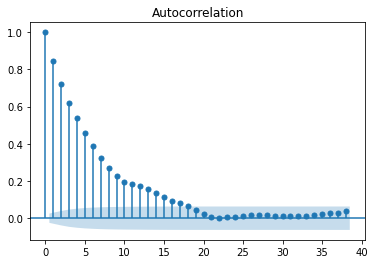

In [648]:
# PACF Plot
from statsmodels.tsa.stattools import acf, pacf
acf=plot_acf(apple_log_ewma_diff)

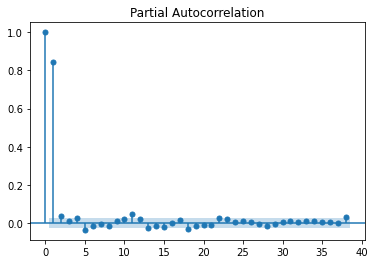

In [649]:
pacf = plot_pacf(apple_log_ewma_diff, method='ols')

In [650]:
apple.isnull().any()

Open           False
High           False
Low            False
Close          False
Volume         False
20_SMA         False
50_SMA         False
MACD           False
MACD_Signal    False
RSI_14         False
Upper_BB       False
Lower_BB       False
MACD           False
MACD_Signal    False
dtype: bool

# Scaling and splitting the data

In [651]:
# Split into train and test data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

X = apple.loc[:,apple.columns !=  'Close']
y = apple['Close']
train_X, test_X, train_y,test_y = train_test_split(X,y,test_size=0.25, random_state=42)

In [652]:
# We now want to check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right. 
print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)

(4609, 13) (4609,)
(1537, 13) (1537,)


# Build Model

In [653]:
#Creating the Regressor
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression()

# Make Predictions

In [654]:
#Make Predictions and Evaluate the results
predict_y = regressor.predict(test_X)
print('Prediction Score : ' , regressor.score(test_X,test_y))
error = mean_squared_error(test_y,predict_y)
print('Mean Squared Error : ',error)

Prediction Score :  0.9998579285543272
Mean Squared Error :  0.8533863519521646


In [655]:
# Order the data by the date
new_df=test_X.merge(test_y, left_index=True, right_index=True)

In [656]:
new_df['Predition'] = predict_y

In [657]:
new_df

,Open,High,Low,Volume,20_SMA,50_SMA,MACD,MACD_Signal,RSI_14,Upper_BB,Lower_BB,MACD,MACD_Signal,Close,Predition
Date,,,,,,,,,,,,,,,
2018-07-26,194.610001,195.960007,193.610001,19076000,184.747836,183.971362,1.720308,1.285852,63.049003,190.782693,178.712980,1.720308,1.285852,189.041946,188.654800
2005-06-10,5.342857,5.342857,5.074286,169733200,4.701603,4.700811,-0.015682,0.021937,40.242677,5.184818,4.218387,-0.015682,0.021937,4.428659,4.175072
2008-12-31,12.281428,12.534286,12.191428,151885300,11.331732,11.617610,-0.337436,-0.277040,40.754877,12.637632,10.025833,-0.337436,-0.277040,10.555326,10.655486
2008-02-27,16.889999,17.578571,16.870001,368784500,15.555779,19.125259,-1.079511,-1.250816,36.891439,16.790141,14.321417,-1.079511,-1.250816,15.206594,14.971600
2016-08-23,108.589996,109.320000,108.529999,21257700,101.316268,95.051753,2.401178,2.586887,67.747760,105.646789,96.985748,2.401178,2.586887,102.925758,103.848689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999-04-27,1.535714,1.636161,1.535714,526512000,1.137532,1.102431,0.039694,0.011519,76.275369,1.304421,0.970643,0.039694,0.011519,1.414488,1.351357
2002-06-17,1.445714,1.473571,1.417857,81152400,1.395906,1.463165,-0.066703,-0.048255,35.735550,1.611889,1.179924,-0.066703,-0.048255,1.270102,0.960043
2015-06-19,127.709999,127.820000,126.400002,54716900,118.935907,118.112570,-0.353181,-0.046903,42.921615,122.209415,115.662400,-0.353181,-0.046903,116.675667,117.247542


In [658]:
new_df.sort_index(inplace=True)

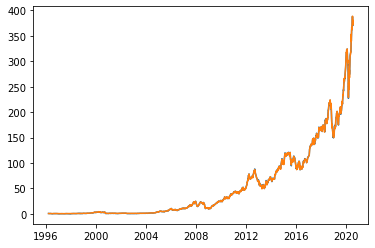

In [659]:
#Plot the predicted and the expected values as scatterplot
fig = plt.figure()
plt.plot(new_df.index,new_df['Predition'])
plt.plot(new_df.index,new_df['Close'])
plt.show()

# Random Forest

In [555]:
from sklearn.ensemble import RandomForestRegressor
# Labels are the values we want to predict
labels = np.array(apple['Close'])

# Remove the labels from the features
# axis 1 refers to the columns
features= apple.drop('Close', axis = 1)

# Saving feature names for later use
feature_list = list(apple.columns)

# Convert to numpy array
features = np.array(features)

In [556]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [557]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (4626, 11)
Training Labels Shape: (4626,)
Testing Features Shape: (1543, 11)
Testing Labels Shape: (1543,)


In [558]:
"""
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('average')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

"""

"\n# The baseline predictions are the historical averages\nbaseline_preds = test_features[:, feature_list.index('average')]\n# Baseline errors, and display average baseline error\nbaseline_errors = abs(baseline_preds - test_labels)\nprint('Average baseline error: ', round(np.mean(baseline_errors), 2))\n\n"

In [559]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [560]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [561]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.4 degrees.


In [562]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.02 %.


In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

# SVM

# Gradient Boosted Trees

In [ ]:
# Optimizing
# pick the fav model and modify the hyper parameters